In [1]:
from PIL import Image, ImageOps, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import colorsys
import math
import pandas as pd

# Data undestanding and pre - processing

In [512]:
input_filename_1 = "population-density-map.bmp"
input_filename_2 = "elevation1x1_new-mer-bleue.bmp"
im_popul = Image.open(input_filename_1)
im_elev = Image.open(input_filename_2)

In [513]:
#display(im_popul)

In [514]:
#display(im_elev)

In [515]:
im_elev.size , im_popul.size #size of each imagen

((4901, 4251), (4830, 3510))

## Population map 

In [516]:
width=im_popul.size[0]
heigth=im_popul.size[1]
colors = im_popul.getcolors(width*heigth)
print('Nb of different colors: %d' % len(colors))

Nb of different colors: 32


According to the information provided, the population density file has a red pixel for the center of Rize and a green pixel for the center of Brest, all other pixels are black and white. Maximum density (absolute white color) is 3000 inhabitants per km2 (every pixel is a square kilometer).


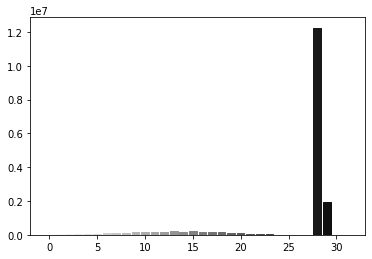

In [517]:
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))


plt.show()


In [518]:
colors

[(91189, (255, 255, 255)),
 (28235, (246, 246, 246)),
 (36939, (238, 238, 238)),
 (47019, (230, 230, 230)),
 (67539, (222, 222, 222)),
 (74903, (213, 213, 213)),
 (87366, (205, 205, 205)),
 (99977, (197, 197, 197)),
 (113816, (189, 189, 189)),
 (147283, (180, 180, 180)),
 (151062, (172, 172, 172)),
 (169603, (164, 164, 164)),
 (183049, (156, 156, 156)),
 (218401, (148, 148, 148)),
 (194375, (139, 139, 139)),
 (195366, (131, 131, 131)),
 (177610, (123, 123, 123)),
 (157859, (115, 115, 115)),
 (151124, (106, 106, 106)),
 (101929, (98, 98, 98)),
 (87459, (90, 90, 90)),
 (49058, (82, 82, 82)),
 (72353, (74, 74, 74)),
 (21953, (65, 65, 65)),
 (7757, (57, 57, 57)),
 (3000, (49, 49, 49)),
 (1357, (41, 41, 41)),
 (301, (32, 32, 32)),
 (12252255, (24, 24, 24)),
 (1963161, (16, 16, 16)),
 (1, (0, 255, 0)),
 (1, (255, 0, 0))]

There are 91189 pixel of complete white color, in other words where there exist 91189* 3000 inhabitants that can help to prevent fight 

In [519]:
pixels_pob = np.array(im_popul) 

print(pixels_pob.shape) #3510 is the height and 4830 the width

(3510, 4830, 3)


In [520]:
# With the image im, let's generate a numpy array to manipulate pixels
p = np.array(im_popul) 
print(p.shape)

(3510, 4830, 3)


In [521]:
mask = np.all(p == (0, 255, 0), axis=-1)
z = np.transpose(np.where(mask))
print("Coordinates (x,y) of the green pixel (Rinze): (%d,%d)" % (z[0][1],z[0][0]))
mask = np.all(p == (255, 0, 0), axis=-1)
z = np.transpose(np.where(mask))
print("Coordinates (x,y) of the red pixel (Brest): (%d,%d)" % (z[0][1],z[0][0]))

Coordinates (x,y) of the green pixel (Rinze): (4426,2108)
Coordinates (x,y) of the red pixel (Brest): (669,1306)


In [522]:
grayim_pop = im_popul.convert("L")
#display(grayim_pop)

Nb of different colors: 32


(array([1.4215717e+07, 1.2114000e+04, 1.4336500e+05, 3.4051200e+05,
        5.3083500e+05, 5.9582600e+05, 4.6794800e+05, 3.0115900e+05,
        1.8946100e+05, 1.5636300e+05]),
 array([ 16. ,  39.9,  63.8,  87.7, 111.6, 135.5, 159.4, 183.3, 207.2,
        231.1, 255. ]),
 <BarContainer object of 10 artists>)

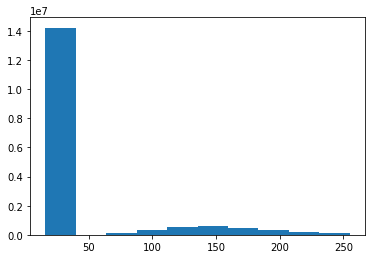

In [523]:
colors = grayim_pop.getcolors(width*heigth)
print('Nb of different colors: %d' % len(colors))
# With the image im, let's generate a numpy array to manipulate pixels
pop = np.array(grayim_pop) 
# plot the histogram. We still have a lot of dark colors. Just to check ;-)
plt.hist(pop.ravel())

(array([1.4215717e+07, 1.2114000e+04, 1.4336500e+05, 3.4051200e+05,
        5.3083500e+05, 5.9582600e+05, 4.6794800e+05, 3.0115900e+05,
        1.8946100e+05, 1.5636300e+05]),
 array([0.0627451 , 0.15647059, 0.25019608, 0.34392157, 0.43764706,
        0.53137255, 0.62509804, 0.71882353, 0.81254902, 0.90627451,
        1.        ]),
 <BarContainer object of 10 artists>)

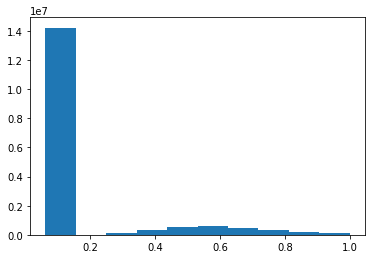

In [524]:
# from gray colors to density
density = pop/255.0
# plot the histogram. We still have a lot of dark colors. Just to check ;-)
plt.hist(density.ravel())

In [525]:
print("Population density in brest: {}".format(density[1306,669]))
print("Population density in Rinze: {}".format(density[2108,4426]))#Poblacional density in brest

Population density in brest: 0.2980392156862745
Population density in Rinze: 0.5882352941176471


## Elevation map

Nb of different colors: 189


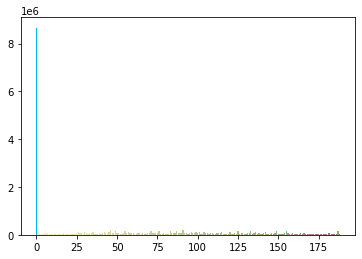

In [526]:
width=im_elev.size[0]
heigth=im_elev.size[1]
colors = im_elev.getcolors(width*heigth)
print('Nb of different colors: %d' % len(colors))
# To plot an histogram
from matplotlib import pyplot as plt
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.show()

The blue corresponds to the sea, being this the distance 0m and the darker brown corresponds to the highest point, which corresponds to the mont blanc located at approximately 4,809 m, it is the highest point in Europe.

In [527]:
#HSV - for hue, saturation, value

def HSVColor(img):
    
    r,g,b = img.split()
    Hdat = []
    Sdat = []
    Vdat = [] 
    for rd,gn,bl in zip(r.getdata(),g.getdata(),b.getdata()) :
        h,s,v = colorsys.rgb_to_hsv(rd/255.,gn/255.,bl/255.)
        Hdat.append(int(h*255.))
        Sdat.append(int(s*255.))
        Vdat.append(int(v*255.))
    r.putdata(Hdat)
    g.putdata(Sdat)
    b.putdata(Vdat)
    return Image.merge('RGB',(r,g,b))

Taking the Hue saturation, 0 red and 240 blue we can obtain another representation of the image

In [528]:
image_hsv = HSVColor(im_elev)

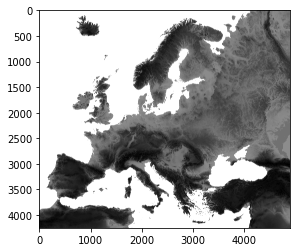

In [529]:
pixels_Hue = np.array(image_hsv) 
plt.imshow(pixels_Hue[:,:,0], cmap ="gray")

In [530]:
pix_H = pixels_Hue[:,:,0] #Dimension Hue
unique= np.unique(pix_H)
print(len(unique))
unique

75


array([  0,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76, 138], dtype=uint8)

In [531]:
pix_H[pix_H == 138] = 78

In [532]:
unique= np.unique(pix_H)
print(len(unique))
unique

75


array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 78], dtype=uint8)

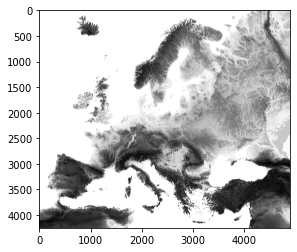

In [533]:
plt.imshow(pix_H, cmap ="gray")

In [534]:
x_1,y_1 = 0 , 255 # 0 :lower height and 255:highest altitud
x_2,y_2 = 78 , 0 # 138 : Blue see color 0: red mountain color

m = (y_2 - y_1) / (x_2 -x_1)
print(m)
aux_x1 = np.full((pix_H.shape[0], pix_H.shape[1]), x_1)
aux_y1 = np.full((pix_H.shape[0], pix_H.shape[1]), y_1)
pix_final = m * (pix_H - aux_x1 ) + aux_y1

-3.269230769230769


In [535]:
unique= np.unique(pix_final)
print(len(unique))
unique

75


array([  0.        ,   6.53846154,   9.80769231,  13.07692308,
        16.34615385,  19.61538462,  22.88461538,  26.15384615,
        29.42307692,  32.69230769,  35.96153846,  39.23076923,
        42.5       ,  45.76923077,  49.03846154,  52.30769231,
        55.57692308,  58.84615385,  62.11538462,  65.38461538,
        68.65384615,  71.92307692,  75.19230769,  78.46153846,
        81.73076923,  85.        ,  88.26923077,  91.53846154,
        94.80769231,  98.07692308, 101.34615385, 104.61538462,
       107.88461538, 111.15384615, 114.42307692, 117.69230769,
       120.96153846, 124.23076923, 127.5       , 130.76923077,
       134.03846154, 137.30769231, 140.57692308, 143.84615385,
       147.11538462, 150.38461538, 153.65384615, 156.92307692,
       160.19230769, 163.46153846, 166.73076923, 170.        ,
       173.26923077, 176.53846154, 179.80769231, 183.07692308,
       186.34615385, 189.61538462, 192.88461538, 196.15384615,
       199.42307692, 202.69230769, 205.96153846, 209.23

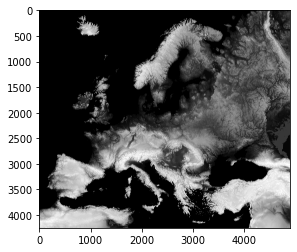

In [536]:
plt.imshow(pix_final, cmap ="gray")

In [537]:
im = Image.fromarray(pix_final)
im = im.convert('L') 
im.save("Elevation_bw_final.bmp") #Export to use matlabcode

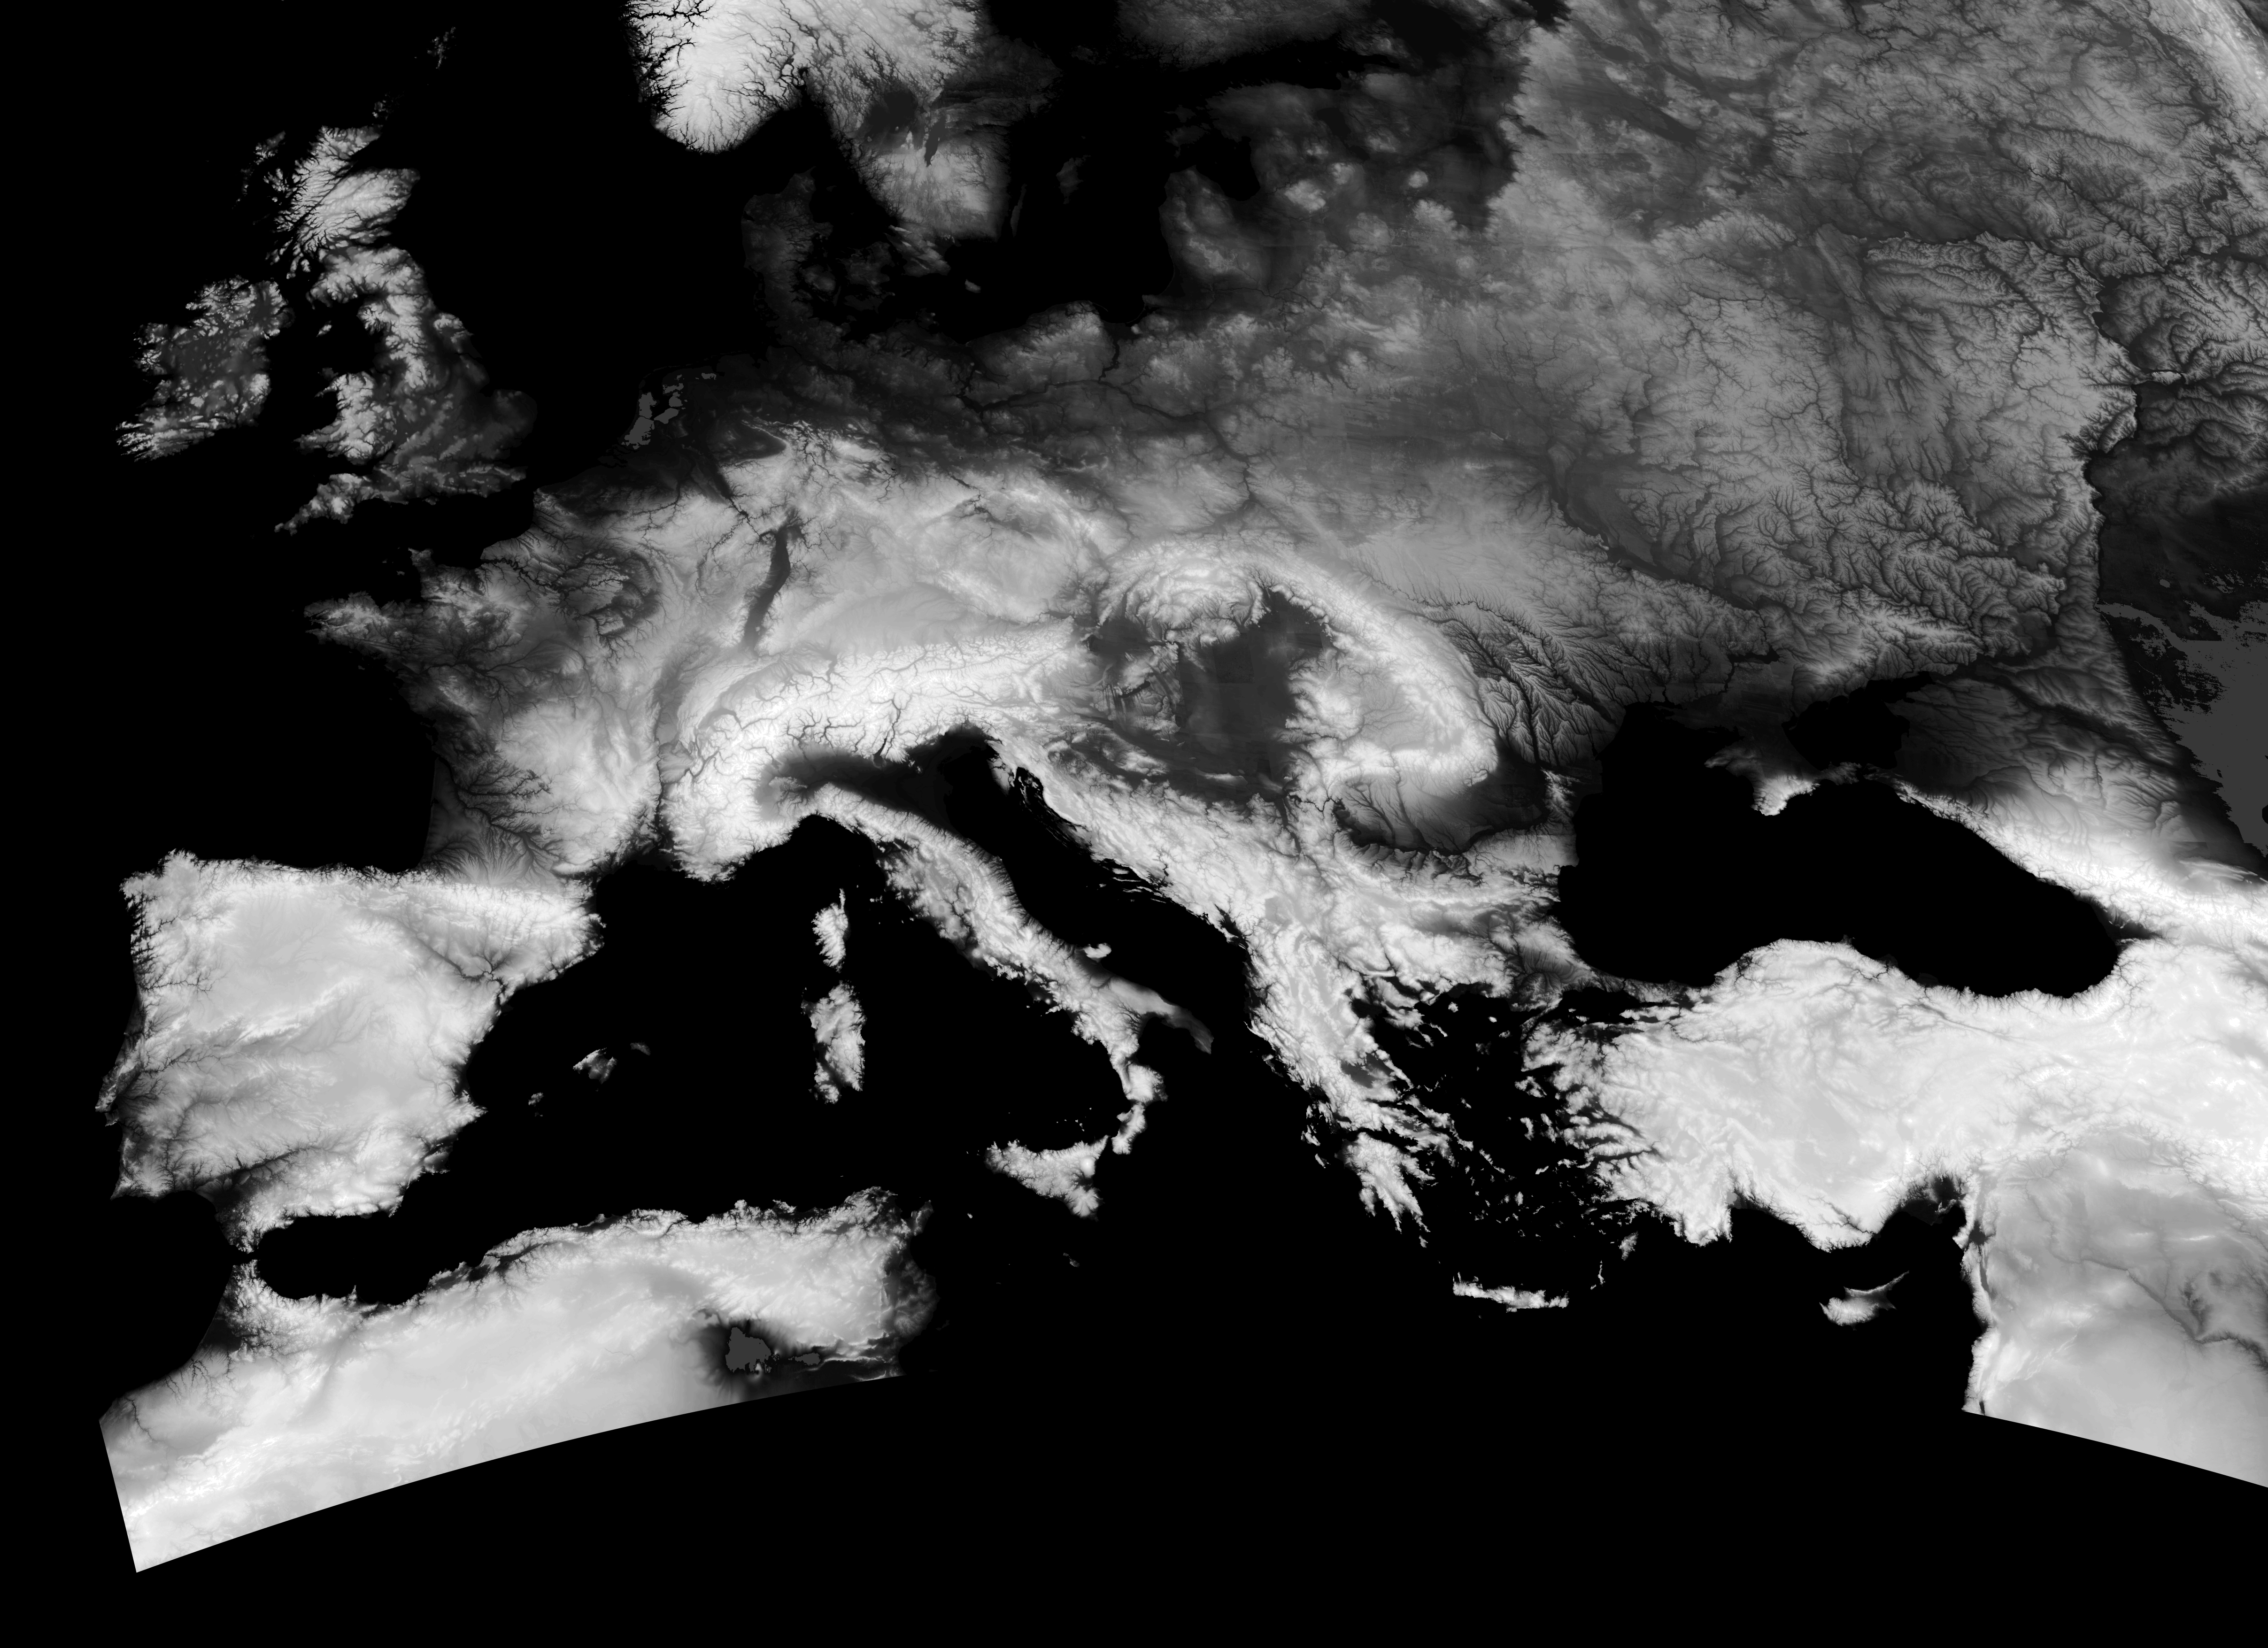

In [538]:
input_filename_3 = "elevation_fixed_2.bmp"
im_elevT1 = Image.open(input_filename_3)
#im_elevT1 = im_elev
width=im_elevT1.size[0]
heigth=im_elevT1.size[1]
display(im_elevT1)

In [539]:
colors= im_elevT1.getcolors(width*heigth)
print('Nb of different colors: %d' % len(colors))

Nb of different colors: 256


In [540]:
im_elevT1.size , im_popul.size #size of each imagen

((4830, 3510), (4830, 3510))

In [541]:
pop = np.array(grayim_pop) 
pop.shape

(3510, 4830)

In [542]:
elevation = np.array(im_elevT1)
elevation.shape

(3510, 4830)

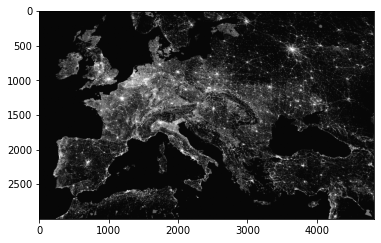

In [543]:
plt.imshow(pop[:3000,:], cmap ="gray")

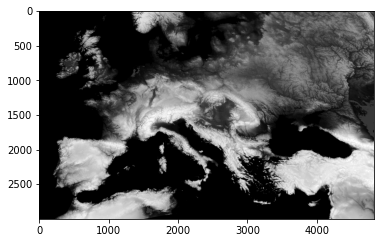

In [544]:
plt.imshow(elevation[:3000,:], cmap ="gray")

In [545]:
Pop_final = pop[:3000,:]
Ele_final = elevation[:3000,:]

pop_density = Pop_final /255 # 1 = 3000 inhabitans 
ele_density = Ele_final /255 # 1 = 4809 m altitud

(array([1.1891935e+07, 1.1257000e+04, 9.7343000e+04, 3.2558700e+05,
        5.2126100e+05, 5.8097700e+05, 4.5177800e+05, 2.8796500e+05,
        1.7934500e+05, 1.4255200e+05]),
 array([0.0627451 , 0.15647059, 0.25019608, 0.34392157, 0.43764706,
        0.53137255, 0.62509804, 0.71882353, 0.81254902, 0.90627451,
        1.        ]),
 <BarContainer object of 10 artists>)

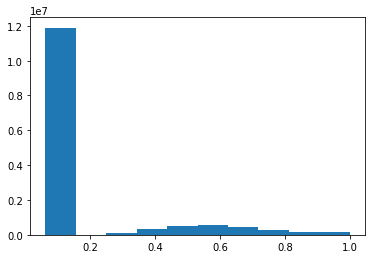

In [546]:
plt.hist(pop_density.ravel())

(array([6086992., 1104992., 1418579., 1045913.,  933831.,  855235.,
         845514.,  978665.,  939569.,  280710.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

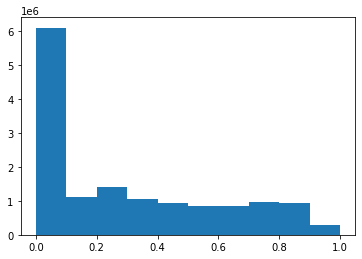

In [547]:
plt.hist(ele_density.ravel())

In [548]:
print("Population density in brest: {}".format(pop_density[1306,669]))
print("Population density in Rinze: {}".format(pop_density[2108,4426]))

Population density in brest: 0.2980392156862745
Population density in Rinze: 0.5882352941176471


In [549]:
print("Altitud density in brest: {}".format(ele_density[1306,669]))
print("Altitud density in Rinze: {}".format(ele_density[2113,4426]))

Altitud density in brest: 0.12941176470588237
Altitud density in Rinze: 0.2823529411764706


In [550]:
ele_density[2113,4426]

0.2823529411764706

In [551]:
ele_density[2109:2116,4422:4428]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.0627451 , 0.02745098,
        0.        ],
       [0.09803922, 0.10980392, 0.18039216, 0.24705882, 0.28235294,
        0.28235294],
       [0.30980392, 0.43137255, 0.45882353, 0.42745098, 0.36078431,
        0.33333333],
       [0.32156863, 0.4627451 , 0.54901961, 0.52941176, 0.42745098,
        0.40392157]])

## Graph construction

In [552]:
pop_density.max()

1.0

In [553]:
from scipy import signal

kernel_1 = np.ones((15,15)) / (15*15)
conv_pop = signal.convolve2d(pop_density, kernel_1 , mode='valid')
conv_ele = signal.convolve2d(ele_density, kernel_1 , mode='valid')

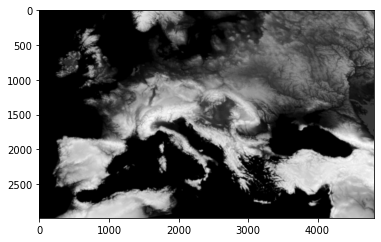

In [554]:
plt.imshow(np.absolute(conv_ele), cmap='gray')

In [555]:
conv_pop.shape , pop_density.shape , conv_ele.shape , ele_density.shape

((2986, 4816), (3000, 4830), (2986, 4816), (3000, 4830))

In [556]:
((pop_density.shape[0] - kernel_1.shape[0] )// 15)+1  , ((pop_density.shape[1] - kernel_1.shape[1] )// 15)+1

(200, 322)

In [557]:
conv_pop_final=conv_pop[list(range(0,conv_pop.shape[0],15)),:]
conv_pop_final=conv_pop_final[:,list(range(0,conv_pop.shape[1],15))]

conv_ele_final=conv_ele[list(range(0,conv_ele.shape[0],15)),:]
conv_ele_final=conv_ele_final[:,list(range(0,conv_ele.shape[1],15))]

In [558]:
conv_pop_final.shape , conv_ele_final.shape 

((200, 322), (200, 322))

In [559]:
conv_pop_final.min() 

0.08658823529411776

In [560]:
[1306 //15,669//15] ,[2108//15,4426//15] #Brest and Rinze

([87, 44], [140, 295])

In [561]:
conv_pop_final[87,44] , conv_pop_final[140,295]

(0.5107276688453152, 0.3797298474945531)

In [562]:
conv_ele_final[87,44] , conv_ele_final[140,295]

(0.06387799564270155, 0.06720697167755994)

In [563]:
conv_ele_final[135:145,290:300]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.14291939e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.10108932e-02, 3.88130719e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.63137255e-02, 6.80261438e-02,
        4.89063181e-01, 8.13228758e-01],
       [2.73638344e-03, 1.74291939e-05, 0.00000000e+00, 0.00000000e+00,
   

In [564]:
conv_pop_final.min() , conv_pop_final.max()

(0.08658823529411776, 0.9982222222222237)

In [565]:
conv_ele_final.min(), conv_ele_final.max()

(0.0, 0.9962004357298492)

In [566]:
def cal_ang (x,y,alt_x,alt_y):
    
    alpha = 0
    d = math.sqrt(pow(x[0] - y[0],2) + pow(x[1] - y[1],2))
    #print(d)
    h = alt_y - alt_x
    #print(h)
    ang = math.degrees(math.atan(h/d))
    #print(ang)
    if ang <= 0:
        alpha = 1
    elif (ang > 0) and (ang < 10):
        alpha = 1 - (ang/10)
    else :
        alpha = 0 
        
    return alpha

In [567]:
x = (0,0)
y = (0,1)
alt_x = 0.9
alt_y = 1
ang = cal_ang (x,y,alt_x,alt_y)
print(ang)

0.4289406862500358


Example of nodes configuration

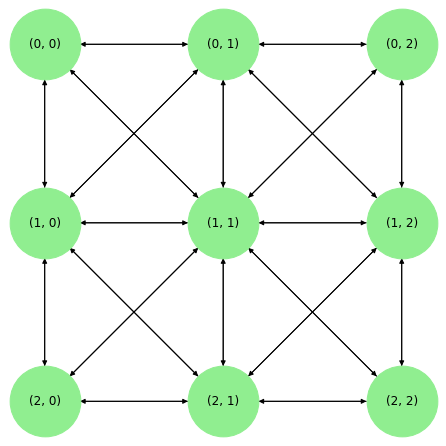

In [6]:
import networkx as nx

nodes_x = 3
nodes_y = 3

G = nx.grid_2d_graph(nodes_x,nodes_y).to_directed()
new_edges = [[((i,j),(i-1,j-1)),((i,j),(i-1,j+1)),((i,j),(i+1,j-1)),((i,j),(i+1,j+1))] 
                for i in range(0,nodes_x) for j in range(0,nodes_y)]
#new_edges += [[((1,0),(0,1)), ((0,nodes-2),(1,nodes-1)), ((nodes-2,0),(nodes-1,1)), ((nodes-2,nodes-1),(nodes-1,nodes-2))]]
G.add_edges_from(sum(new_edges,[]))

G_aux = G.copy()
#### To fix diagonals

for node in G.nodes():
    if (node[0] < 0) or (node[1] < 0 ) or (node[0] == nodes_x) or (node[1] == nodes_y ) :
        G_aux.remove_node(node)
        
plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G_aux.nodes()}
nx.draw(G_aux, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=5000)

#nx.draw(G_aux, pos=pos, node_size=10)        

In [568]:
import networkx as nx

nodes_x = 200
nodes_y = 322

G = nx.grid_2d_graph(nodes_x,nodes_y).to_directed()
new_edges = [[((i,j),(i-1,j-1)),((i,j),(i-1,j+1)),((i,j),(i+1,j-1)),((i,j),(i+1,j+1))] 
                for i in range(0,nodes_x) for j in range(0,nodes_y)]
#new_edges += [[((1,0),(0,1)), ((0,nodes-2),(1,nodes-1)), ((nodes-2,0),(nodes-1,1)), ((nodes-2,nodes-1),(nodes-1,nodes-2))]]
G.add_edges_from(sum(new_edges,[]))

In [569]:
G_aux = G.copy()
#### To fix diagonals

for node in G.nodes():
    if (node[0] < 0) or (node[1] < 0 ) or (node[0] == nodes_x) or (node[1] == nodes_y ) :
        G_aux.remove_node(node)

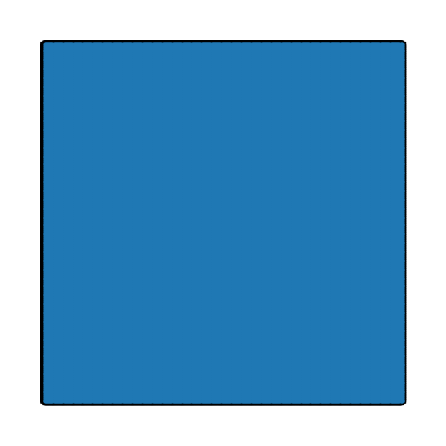

In [570]:
plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G_aux.nodes()}
# nx.draw(G_aux, pos=pos, 
#         node_color='lightgreen', 
#         with_labels=False,
#         node_size=50)

nx.draw(G_aux, pos=pos, node_size=10)

In [571]:
# for node in G_aux.nodes():
#     print(node)
#     print(conv_pop_final[node[0],node[1]]*3000)
#     print(conv_ele_final[node[0],node[1]])


nx.set_node_attributes(G_aux, {node: {'node_id': 'U' + str(i), 'human_pop': int(conv_pop_final[node[0],node[1]]*3000), 'zombie_pop': 0} 
                                for i, node in enumerate(G_aux.nodes)})

#Node_id=nx.get_node_attributes(G_aux,'node_id')
# for i, n in enumerate(G_aux.nodes):
#     print(i)
#     print(n)

In [572]:
[n for n in G_aux.neighbors((1,1))]

[(0, 1), (2, 1), (1, 0), (1, 2), (0, 0), (0, 2), (2, 0), (2, 2)]

In [573]:
dic_edges= {e:cal_ang(e[0],e[1],conv_ele_final[e[0]],conv_ele_final[e[1]]) for e in G_aux.edges}

In [574]:
nx.set_edge_attributes(G_aux, dic_edges, name = 'elev_factor')

In [575]:
elev=nx.get_edge_attributes(G_aux,'elev_factor')

In [576]:
See_location= np.transpose(np.nonzero(conv_ele_final ==0))
See_l = [(g[0],g[1]) for g in See_location]

In [577]:
G_aux_2 = G_aux.copy()

for node in G_aux.nodes():
    if node in See_l:
        G_aux_2.remove_node(node)

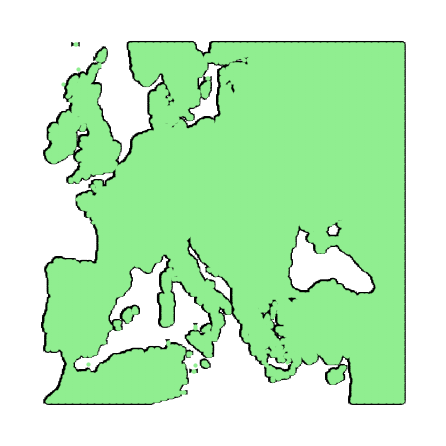

In [578]:
plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G_aux_2.nodes()}
# nx.draw(G_aux_2, pos=pos, 
#         node_color='lightgreen', 
#         with_labels=True,
#         node_size=600)
nx.draw(G_aux_2, pos=pos, 
        node_color='lightgreen',
        node_size=10 , width=0.5)

In [579]:
loc_brest= (87,44)
loc_Rinze = (140, 295)

In [580]:
nx.get_node_attributes(G_aux_2, 'human_pop')[loc_Rinze]

1139

In [581]:
str(loc_Rinze)

'(140, 295)'

In [582]:
nx.set_node_attributes(G_aux_2, {loc_Rinze: int(conv_pop_final[loc_Rinze[0],loc_Rinze[1]]*3000)}, name = 'zombie_pop')
nx.set_node_attributes(G_aux_2, {loc_Rinze: 0}, name = 'human_pop')

In [583]:
nx.get_node_attributes(G_aux_2, 'node_id')[loc_Rinze], nx.get_node_attributes(G_aux_2, 'zombie_pop')[loc_Rinze] , nx.get_node_attributes(G_aux_2, 'human_pop')[loc_Rinze]

('U45375', 1139, 0)

In [584]:
nx.get_node_attributes(G_aux_2, 'node_id')[loc_brest], nx.get_node_attributes(G_aux_2, 'zombie_pop')[loc_brest] , nx.get_node_attributes(G_aux_2, 'human_pop')[loc_brest]

('U28058', 0, 1532)

In [585]:
#nx.write_gexf(G_aux, "All_nodes_graph.gexf")
nx.write_gexf(G_aux_2, "without_see_nodes_graph_ini_3.gexf")

In [586]:
import pickle

a_file = open("Positions_without_see_graph_3.pkl", "wb")
pickle.dump(pos, a_file)
a_file.close()

In [587]:
len(G_aux_2.nodes()) , len(G_aux_2.edges())

(43323, 335838)

In [588]:
G_zombie = nx.read_gexf("without_see_nodes_graph_ini_3.gexf")

In [589]:
len(G_zombie.nodes()) , len(G_zombie.edges())

(43323, 335838)

In [590]:
elev_2=nx.get_edge_attributes(G_zombie,'elev_factor')

In [591]:
elev_2=nx.get_node_attributes(G_zombie,'elev_factor')